In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [2]:
import os
file_one,file_two = os.listdir(path)
print('done')

done


In [3]:
file_one_path = path + '/' + file_one
file_two_path = path + '/' + file_two

print(file_one_path)
print(file_two_path)

C:\Users\Dell\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv
C:\Users\Dell\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv


In [4]:
#STEP1 importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print('done')

done


In [5]:
df_deliveries = pd.read_csv(file_one_path)
df_matches  = pd.read_csv(file_two_path)
print('done')

done


In [6]:
#EDA
df_matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [7]:
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
df_matches.shape

(1095, 20)

In [9]:
df_deliveries.shape

(260920, 17)

In [10]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [11]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [12]:
df_matches.isna().sum().sort_values(ascending = False)


method             1074
city                 51
result_margin        19
winner                5
player_of_match       5
target_overs          3
target_runs           3
id                    0
umpire1               0
super_over            0
result                0
toss_decision         0
season                0
toss_winner           0
team2                 0
team1                 0
venue                 0
match_type            0
date                  0
umpire2               0
dtype: int64

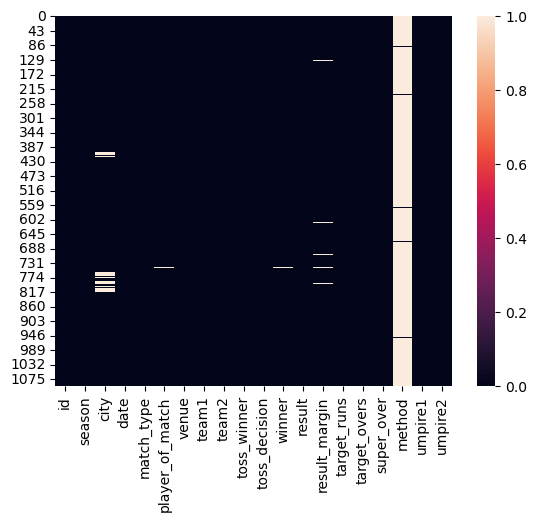

In [13]:
sns.heatmap(df_matches.isna())
plt.show()

In [14]:
#now we will check the null values in the percentage
df_matches.isna().mean().sort_values(ascending = False)*100


method             98.082192
city                4.657534
result_margin       1.735160
winner              0.456621
player_of_match     0.456621
target_overs        0.273973
target_runs         0.273973
id                  0.000000
umpire1             0.000000
super_over          0.000000
result              0.000000
toss_decision       0.000000
season              0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
venue               0.000000
match_type          0.000000
date                0.000000
umpire2             0.000000
dtype: float64

In [15]:
#we will call the columns with the missing values before filling them or droping them
df_matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [16]:
df_matches['method'].fillna('Normal method', inplace=True)

In [17]:
df_matches['method'].value_counts()

method
Normal method    1074
D/L                21
Name: count, dtype: int64

In [18]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [19]:
#masking

df_matches[df_matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,Normal method,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,Normal method,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,Normal method,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,Normal method,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,Normal method,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,Normal method,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,Normal method,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,Normal method,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,Normal method,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,Normal method,Aleem Dar,VA Kulkarni


In [20]:
df_matches['city'].fillna('UAE', inplace=True)
print('done')

done


In [21]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
UAE                51
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [22]:
df_matches.isna().mean().sort_values(ascending = False)*100

result_margin      1.735160
winner             0.456621
player_of_match    0.456621
target_overs       0.273973
target_runs        0.273973
id                 0.000000
umpire1            0.000000
method             0.000000
super_over         0.000000
result             0.000000
toss_decision      0.000000
season             0.000000
toss_winner        0.000000
team2              0.000000
team1              0.000000
venue              0.000000
match_type         0.000000
date               0.000000
city               0.000000
umpire2            0.000000
dtype: float64

In [23]:
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,Normal method,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,Normal method,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,Normal method,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,Normal method,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,Normal method,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,Normal method,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,Normal method,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,Normal method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,Normal method,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,Normal method,AK Chaudhary,CB Gaffaney


In [24]:
df_matches['result_margin'].fillna(0,inplace=True)

In [25]:
df_matches[df_matches['winner'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,Normal method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,Normal method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,Normal method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,Normal method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,Normal method,AK Chaudhary,NA Patwardhan


In [26]:
df_matches.fillna({'player_of_match' : 'No player of the match',
                  'winner' : 'No winner'},inplace = True)
print('Done')

Done


In [27]:
df_matches.fillna(0,inplace = True)
print('Done')

Done


In [28]:
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

<Axes: >

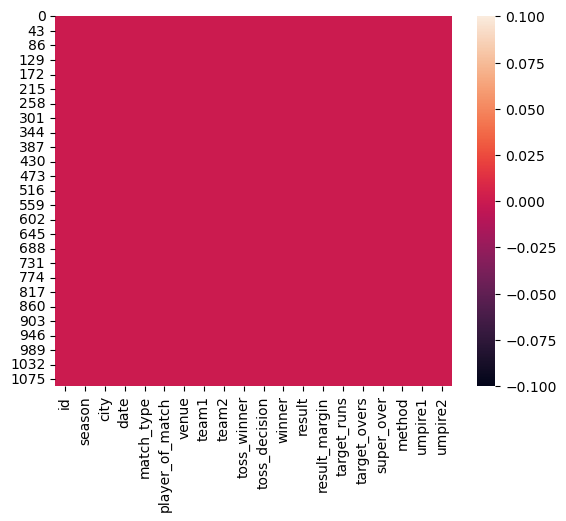

In [29]:
sns.heatmap(df_matches.isna())

In [30]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
UAE                51
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [31]:
data_rp = {'Navi Mumbai' : 'Mumbai',
          'Bengaluru' : 'Bangalore ',
          'Abu Dhabi' : 'UAE',
          'Sharjah' : 'UAE',
          'Kimberley' : 'Cape Town',
           'Dubai' : 'UAE'
          }

df_matches.replace(data_rp,inplace = True)
print('done')

done


In [32]:
df_matches.duplicated('id').value_counts()

False    1095
Name: count, dtype: int64

In [33]:
df_matches.drop_duplicates('id',inplace=True)

In [34]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [35]:
#DATE column must be in data datatype

df_matches['date'] = pd.to_datetime(df_matches['date'])
print('done')

done


In [36]:
df_matches['venue'].value_counts().index

Index(['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Dubai International Cricket Stadium', 'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai',
       'Narendra Modi Stadium, Ahmedabad',
       'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy', 'Eden Gardens, Kolkata',
       'Subrata Roy Sahara Stadium', 'Arun Jaitley Stadium, Delhi',
       'Rajiv Gandhi International Stadium', 'M.Chinnaswamy Stadium',
       'Kingsmead', 'Arun Jaitley Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'M Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi Internat

In [37]:
df_matches['venue'].str.split(',')

0                                 [M Chinnaswamy Stadium]
1           [Punjab Cricket Association Stadium,  Mohali]
2                                      [Feroz Shah Kotla]
3                                      [Wankhede Stadium]
4                                          [Eden Gardens]
                              ...                        
1090    [Rajiv Gandhi International Stadium,  Uppal,  ...
1091                  [Narendra Modi Stadium,  Ahmedabad]
1092                  [Narendra Modi Stadium,  Ahmedabad]
1093         [MA Chidambaram Stadium,  Chepauk,  Chennai]
1094         [MA Chidambaram Stadium,  Chepauk,  Chennai]
Name: venue, Length: 1095, dtype: object

In [38]:
df_matches['venue'] = df_matches['venue'].apply(lambda row : row.title().split(',')[0])
#apply method will help to run a rowwise or column

In [39]:
df_matches['venue'].value_counts()

venue
Wankhede Stadium                                                118
Eden Gardens                                                     93
Ma Chidambaram Stadium                                           85
M Chinnaswamy Stadium                                            79
Rajiv Gandhi International Stadium                               77
Feroz Shah Kotla                                                 60
Sawai Mansingh Stadium                                           57
Dubai International Cricket Stadium                              46
Dr Dy Patil Sports Academy                                       37
Maharashtra Cricket Association Stadium                          35
Punjab Cricket Association Stadium                               35
Arun Jaitley Stadium                                             30
Sheikh Zayed Stadium                                             29
Sharjah Cricket Stadium                                          28
Brabourne Stadium                         

In [40]:
data_v_rp = {
    'M.Chinnaswamy Stadium' : 'M Chinnaswamy Stadium',
    'Feroz Shah Kotla'  : 'Arun Jaitley Stadium',
    'Sardar Patel Stadium' : 'Narendra Modi Stadium',
    'Punjab Cricket Association Is Bindra Stadium' : 'Punjab Cricket Association Stadium'
}
df_matches.replace(data_v_rp,inplace = True)

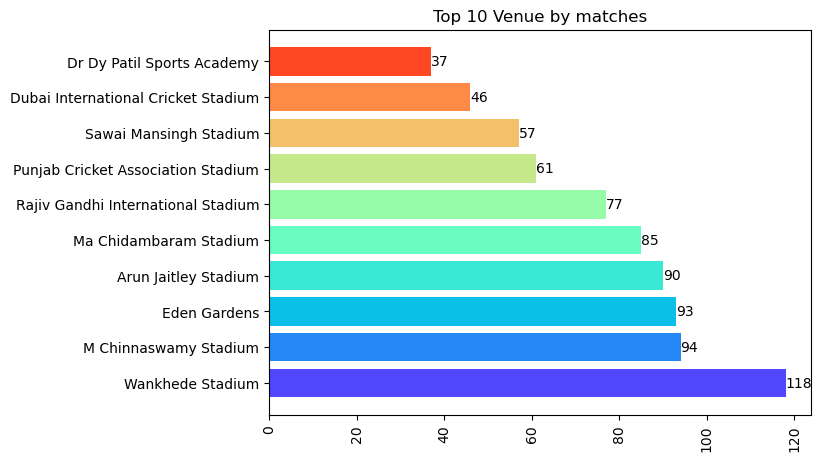

In [41]:
x = df_matches['venue'].value_counts().head(10).index
y = df_matches['venue'].value_counts().head(10).values

plt.figure(figsize=(7,5))
ax = plt.barh(x,y,color = sns.color_palette('rainbow',10))
plt.bar_label(ax)
plt.title('Top 10 Venue by matches')
plt.xticks(rotation = 90)
plt.show()

In [42]:
print('done')

done


In [43]:
df_matches['team1'].value_counts().reset_index()

,team1,count
0,Royal Challengers Bangalore,135
1,Chennai Super Kings,128
2,Mumbai Indians,123
3,Kolkata Knight Riders,121
4,Rajasthan Royals,101
5,Kings XI Punjab,92
6,Sunrisers Hyderabad,86
7,Delhi Daredevils,85
8,Delhi Capitals,41
9,Deccan Chargers,39


In [44]:
import warnings
warnings.filterwarnings('ignore')


team_name_rp = {
    'Delhi Capitals' : 'Delhi Daredevils',
    'Royal Challengers Bengaluru' : 'Royal Challengers Bangalore',
    'Rising Pune Supergiant' : 'Rising Pune Supergiants',
    'Kings XI Punjab' : 'Punjab Kings',
    'Pune Warriors' : 'Rising Pune Supergiants'
}
df_matches[['team1','team2']] = df_matches[['team1','team2']].replace(team_name_rp)
print('done')


done


In [45]:
df_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal method,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal method,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Normal method,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal method,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal method,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Normal method,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Narendra Modi Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,Normal method,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Narendra Modi Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,Normal method,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Ma Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Normal method,Nitin Menon,VK Sharma


In [46]:
df_matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
912,1304083,2022,Mumbai,2022-04-24,League,KL Rahul,Wankhede Stadium,Lucknow Super Giants,Mumbai Indians,Mumbai Indians,field,Lucknow Super Giants,runs,36.0,169.0,20.0,N,Normal method,M Erasmus,HAS Khalid
392,598067,2013,Pune,2013-05-19,League,LJ Wright,Subrata Roy Sahara Stadium,Rising Pune Supergiants,Delhi Daredevils,Pune Warriors,bat,Pune Warriors,runs,38.0,173.0,20.0,N,Normal method,NJ Llong,SJA Taufel
1088,1426305,2024,Mumbai,2024-05-17,League,N Pooran,Wankhede Stadium,Lucknow Super Giants,Mumbai Indians,Mumbai Indians,field,Lucknow Super Giants,runs,18.0,215.0,20.0,N,Normal method,Navdeep Singh,R Pandit
591,1082605,2017,Delhi,2017-04-15,League,CJ Anderson,Arun Jaitley Stadium,Delhi Daredevils,Punjab Kings,Delhi Daredevils,bat,Delhi Daredevils,runs,51.0,189.0,20.0,N,Normal method,YC Barde,Nitin Menon
1032,1422127,2024,Jaipur,2024-03-28,League,R Parag,Sawai Mansingh Stadium,Rajasthan Royals,Delhi Daredevils,Delhi Capitals,field,Rajasthan Royals,runs,12.0,186.0,20.0,N,Normal method,A Nand Kishore,Nitin Menon


In [47]:
df_matches[['toss_winner','winner']].replace(team_name_rp,inplace = True)
print('Done')

Done


In [48]:
df_matches.drop(['umpire1','umpire2'],axis=1 ,inplace=True)
print('Done')

Done


In [49]:
df_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal method
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal method
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Normal method
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal method
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal method
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Normal method
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,Narendra Modi Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,Normal method
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,Narendra Modi Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,Normal method
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,Ma Chidambaram Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Normal method


In [50]:
df_matches['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No winner                        5
Name: count, dtype: int64

In [51]:
df_matches.shape

(1095, 18)

In [52]:
df_matches[df_matches['match_type']=='Final']['winner'].value_counts()

winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64

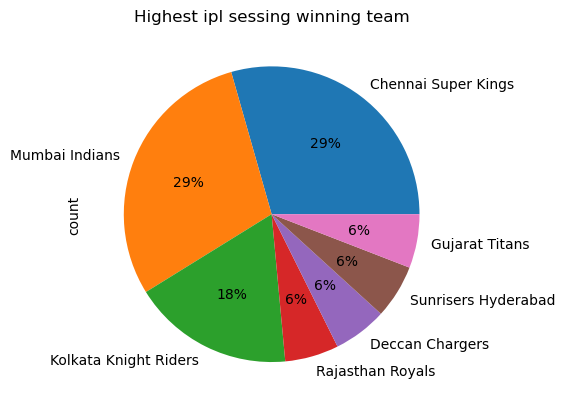

In [53]:
plt.title('Highest ipl sessing winning team')
df_matches[df_matches['match_type']=='Final']['winner'].value_counts().plot(kind = 'pie',autopct = '%.f%%')
plt.show()

In [54]:
final_match = df_matches[df_matches['match_type'] == 'Final']
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal method
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal method
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal method
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal method
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal method
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal method
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal method
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal method
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal method
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,Rajiv Gandhi International Stadium,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal method


In [55]:
df_matches['date'].dt.year

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
1090    2024
1091    2024
1092    2024
1093    2024
1094    2024
Name: date, Length: 1095, dtype: int32

In [56]:
final_match['Winning year'] = final_match['date'].dt.year
print('done')

done


In [57]:
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,Winning year
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr Dy Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal method,2008
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal method,2009
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr Dy Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal method,2010
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,Ma Chidambaram Stadium,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal method,2011
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,Ma Chidambaram Stadium,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal method,2012
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal method,2013
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal method,2014
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal method,2015
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal method,2016
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,Rajiv Gandhi International Stadium,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal method,2017


In [58]:
#@1 All season winner team
final_match[['Winning year','winner']].sort_values('Winning year') 


,Winning year,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


In [59]:
final_match['result'].value_counts()

result
runs       9
wickets    8
Name: count, dtype: int64

In [60]:
df_matches.groupby('venue')['result'].value_counts().sort_values(ascending = False)

venue                                                         result   
Wankhede Stadium                                              wickets      64
                                                              runs         53
Eden Gardens                                                  wickets      53
M Chinnaswamy Stadium                                         wickets      49
Ma Chidambaram Stadium                                        runs         47
                                                                           ..
Saurashtra Cricket Association Stadium                        tie           1
Rajiv Gandhi International Stadium                            tie           1
Barsapara Cricket Stadium                                     wickets       1
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium  no result     1
Newlands                                                      tie           1
Name: count, Length: 88, dtype: int64

In [61]:
final_match.groupby('venue')['result'].value_counts().reset_index()

,venue,result,count
0,Dr Dy Patil Sports Academy,runs,1
1,Dr Dy Patil Sports Academy,wickets,1
2,Dubai International Cricket Stadium,runs,1
3,Dubai International Cricket Stadium,wickets,1
4,Eden Gardens,runs,2
5,M Chinnaswamy Stadium,runs,1
6,M Chinnaswamy Stadium,wickets,1
7,Ma Chidambaram Stadium,wickets,2
8,Ma Chidambaram Stadium,runs,1
9,Narendra Modi Stadium,wickets,2


In [62]:
final_match.groupby('venue')['result'].value_counts().reset_index().sort_values(by = 'count',ascending = False)

,venue,result,count
4,Eden Gardens,runs,2
7,Ma Chidambaram Stadium,wickets,2
9,Narendra Modi Stadium,wickets,2
11,Rajiv Gandhi International Stadium,runs,2
0,Dr Dy Patil Sports Academy,runs,1
1,Dr Dy Patil Sports Academy,wickets,1
2,Dubai International Cricket Stadium,runs,1
3,Dubai International Cricket Stadium,wickets,1
5,M Chinnaswamy Stadium,runs,1
6,M Chinnaswamy Stadium,wickets,1


In [63]:
df_matches.groupby('venue')['result'].value_counts().reset_index().sort_values(by = 'venue')

,venue,result,count
0,Arun Jaitley Stadium,wickets,44
1,Arun Jaitley Stadium,runs,44
2,Arun Jaitley Stadium,tie,1
3,Arun Jaitley Stadium,no result,1
4,Barabati Stadium,runs,4
...,...,...,...
83,Wankhede Stadium,wickets,64
84,Wankhede Stadium,runs,53
85,Wankhede Stadium,tie,1
86,Zayed Cricket Stadium,wickets,5


In [64]:
print('done')

done


# day 13

In [66]:
# Questions to be solve?

# Top 10 Match Winner team
# Toss_dicision_value_counts
# Result type value_counts
# Top 10 target Runs
# Maximum Result Margin Wins
# Top 5 Result Margin Wins
# Top 10 player_of_match
# Season Player of the match

# @2 Top 10 Match Winner team

In [68]:
df_matches['winner'].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

# Toss_dicision_value_counts

In [70]:
num_col = df_matches.describe().columns
cat_col = df_matches.describe(include = 'O').columns

In [71]:
print(cat_col)

Index(['season', 'city', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'super_over', 'method'],
      dtype='object')


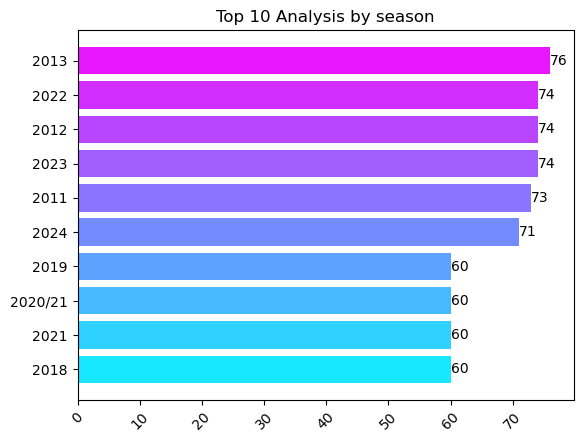

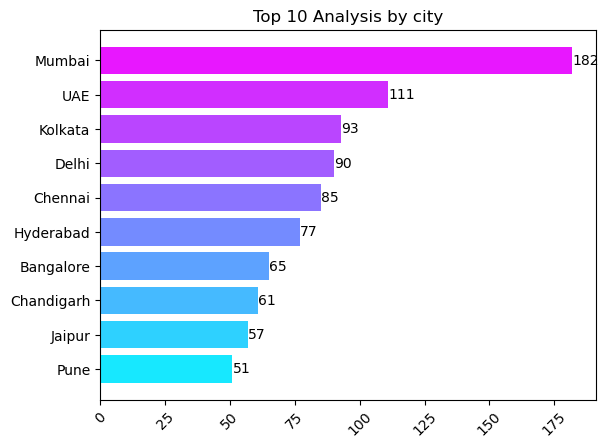

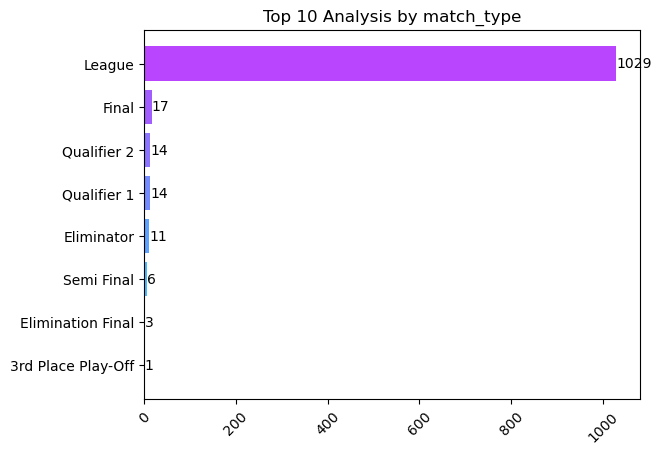

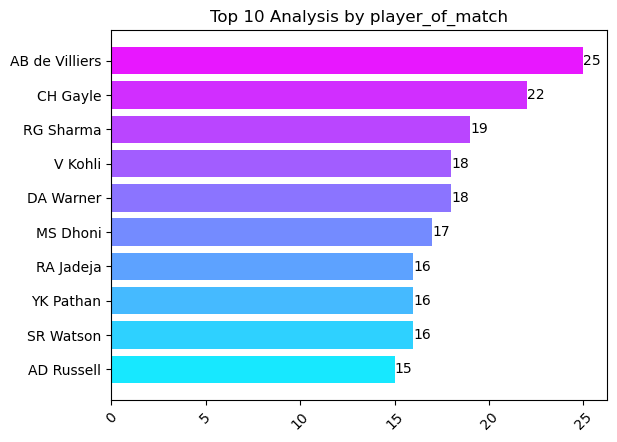

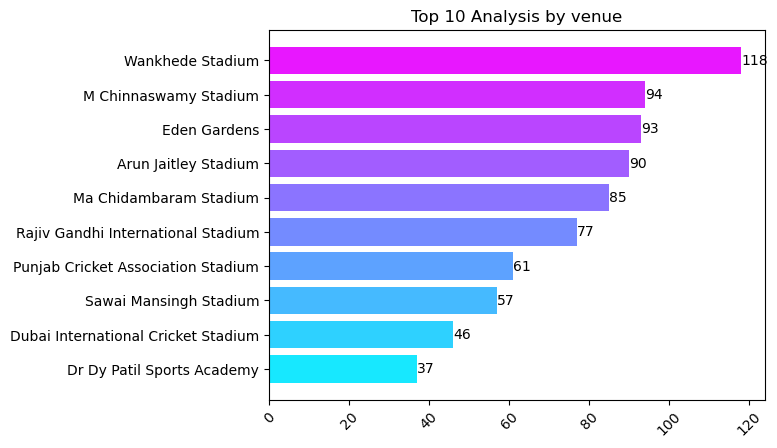

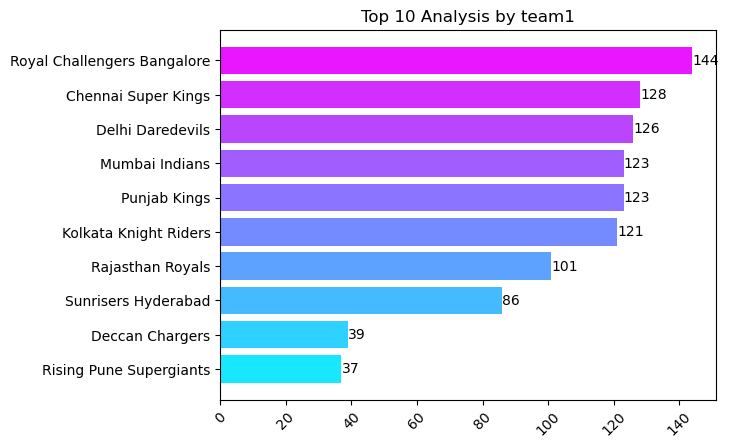

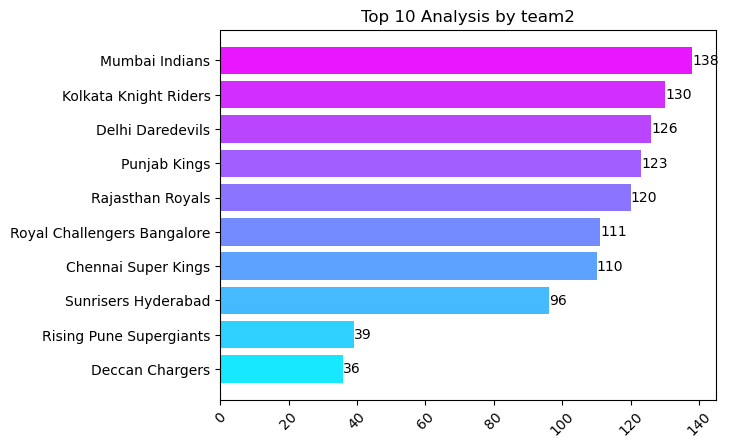

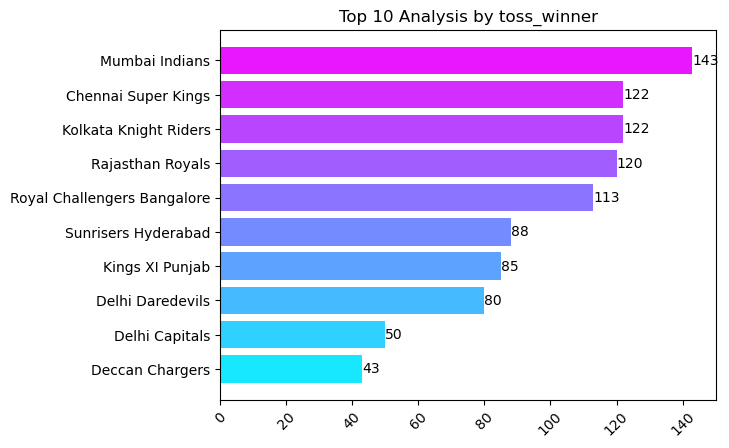

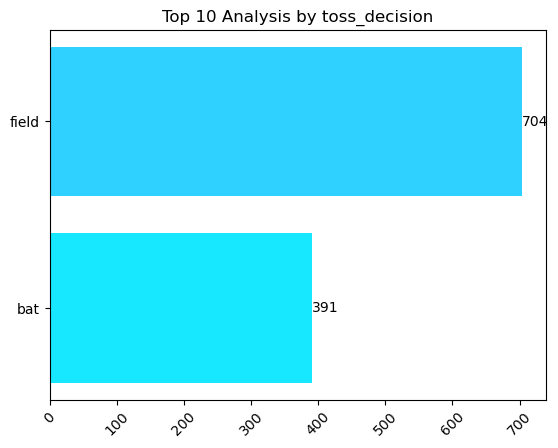

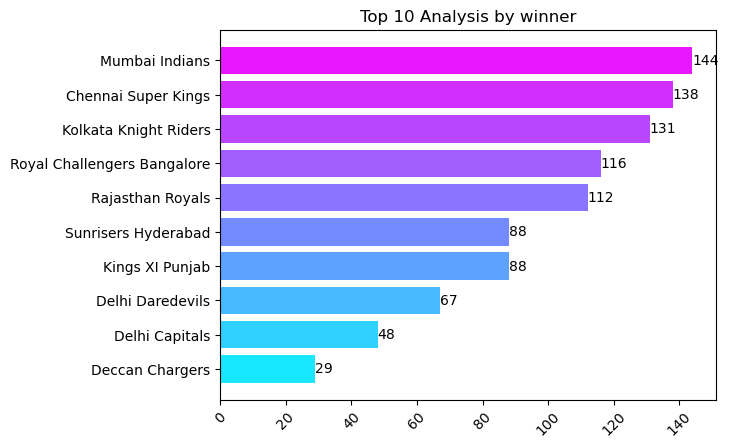

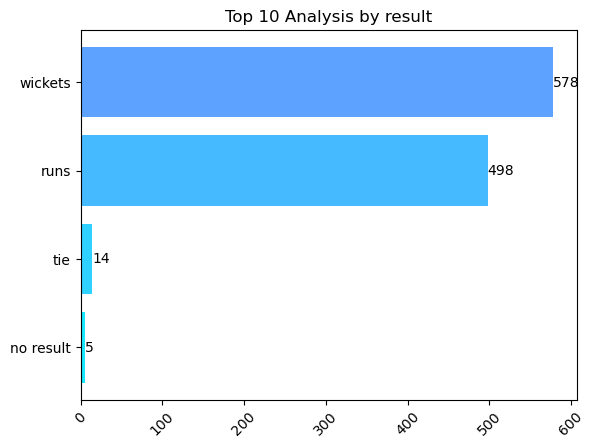

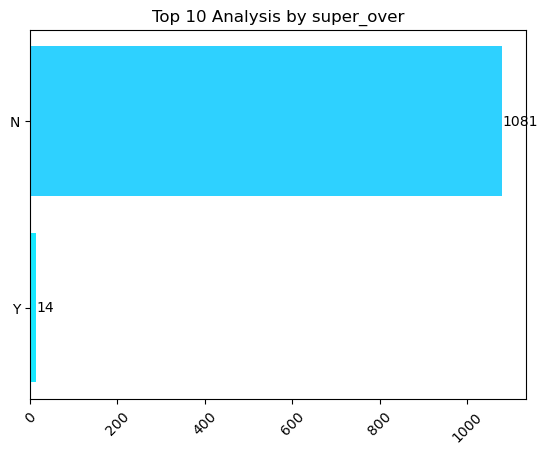

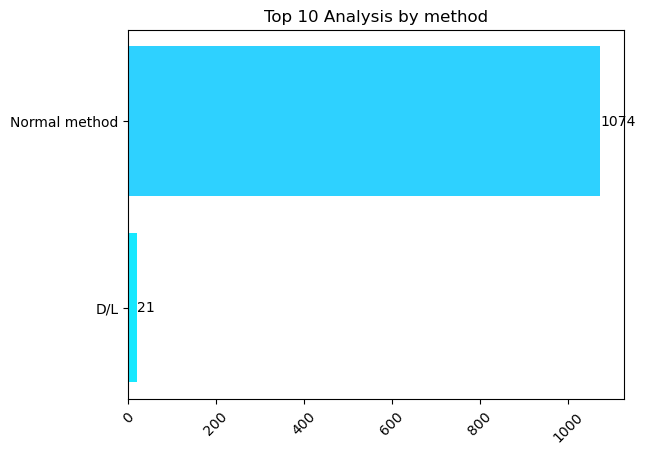

In [72]:
for i in cat_col:

    try:
        temp_df = df_matches[i].value_counts().head(10).sort_values(ascending = True)
        x = temp_df.index
        y = temp_df.values
    
        plt.title(f'Top 10 Analysis by {i}')
        ax = plt.barh(x,y,color = sns.color_palette('cool',10))
        plt.bar_label(ax)
        plt.xticks(rotation = 45)
        plt.show()

    except:
        pass

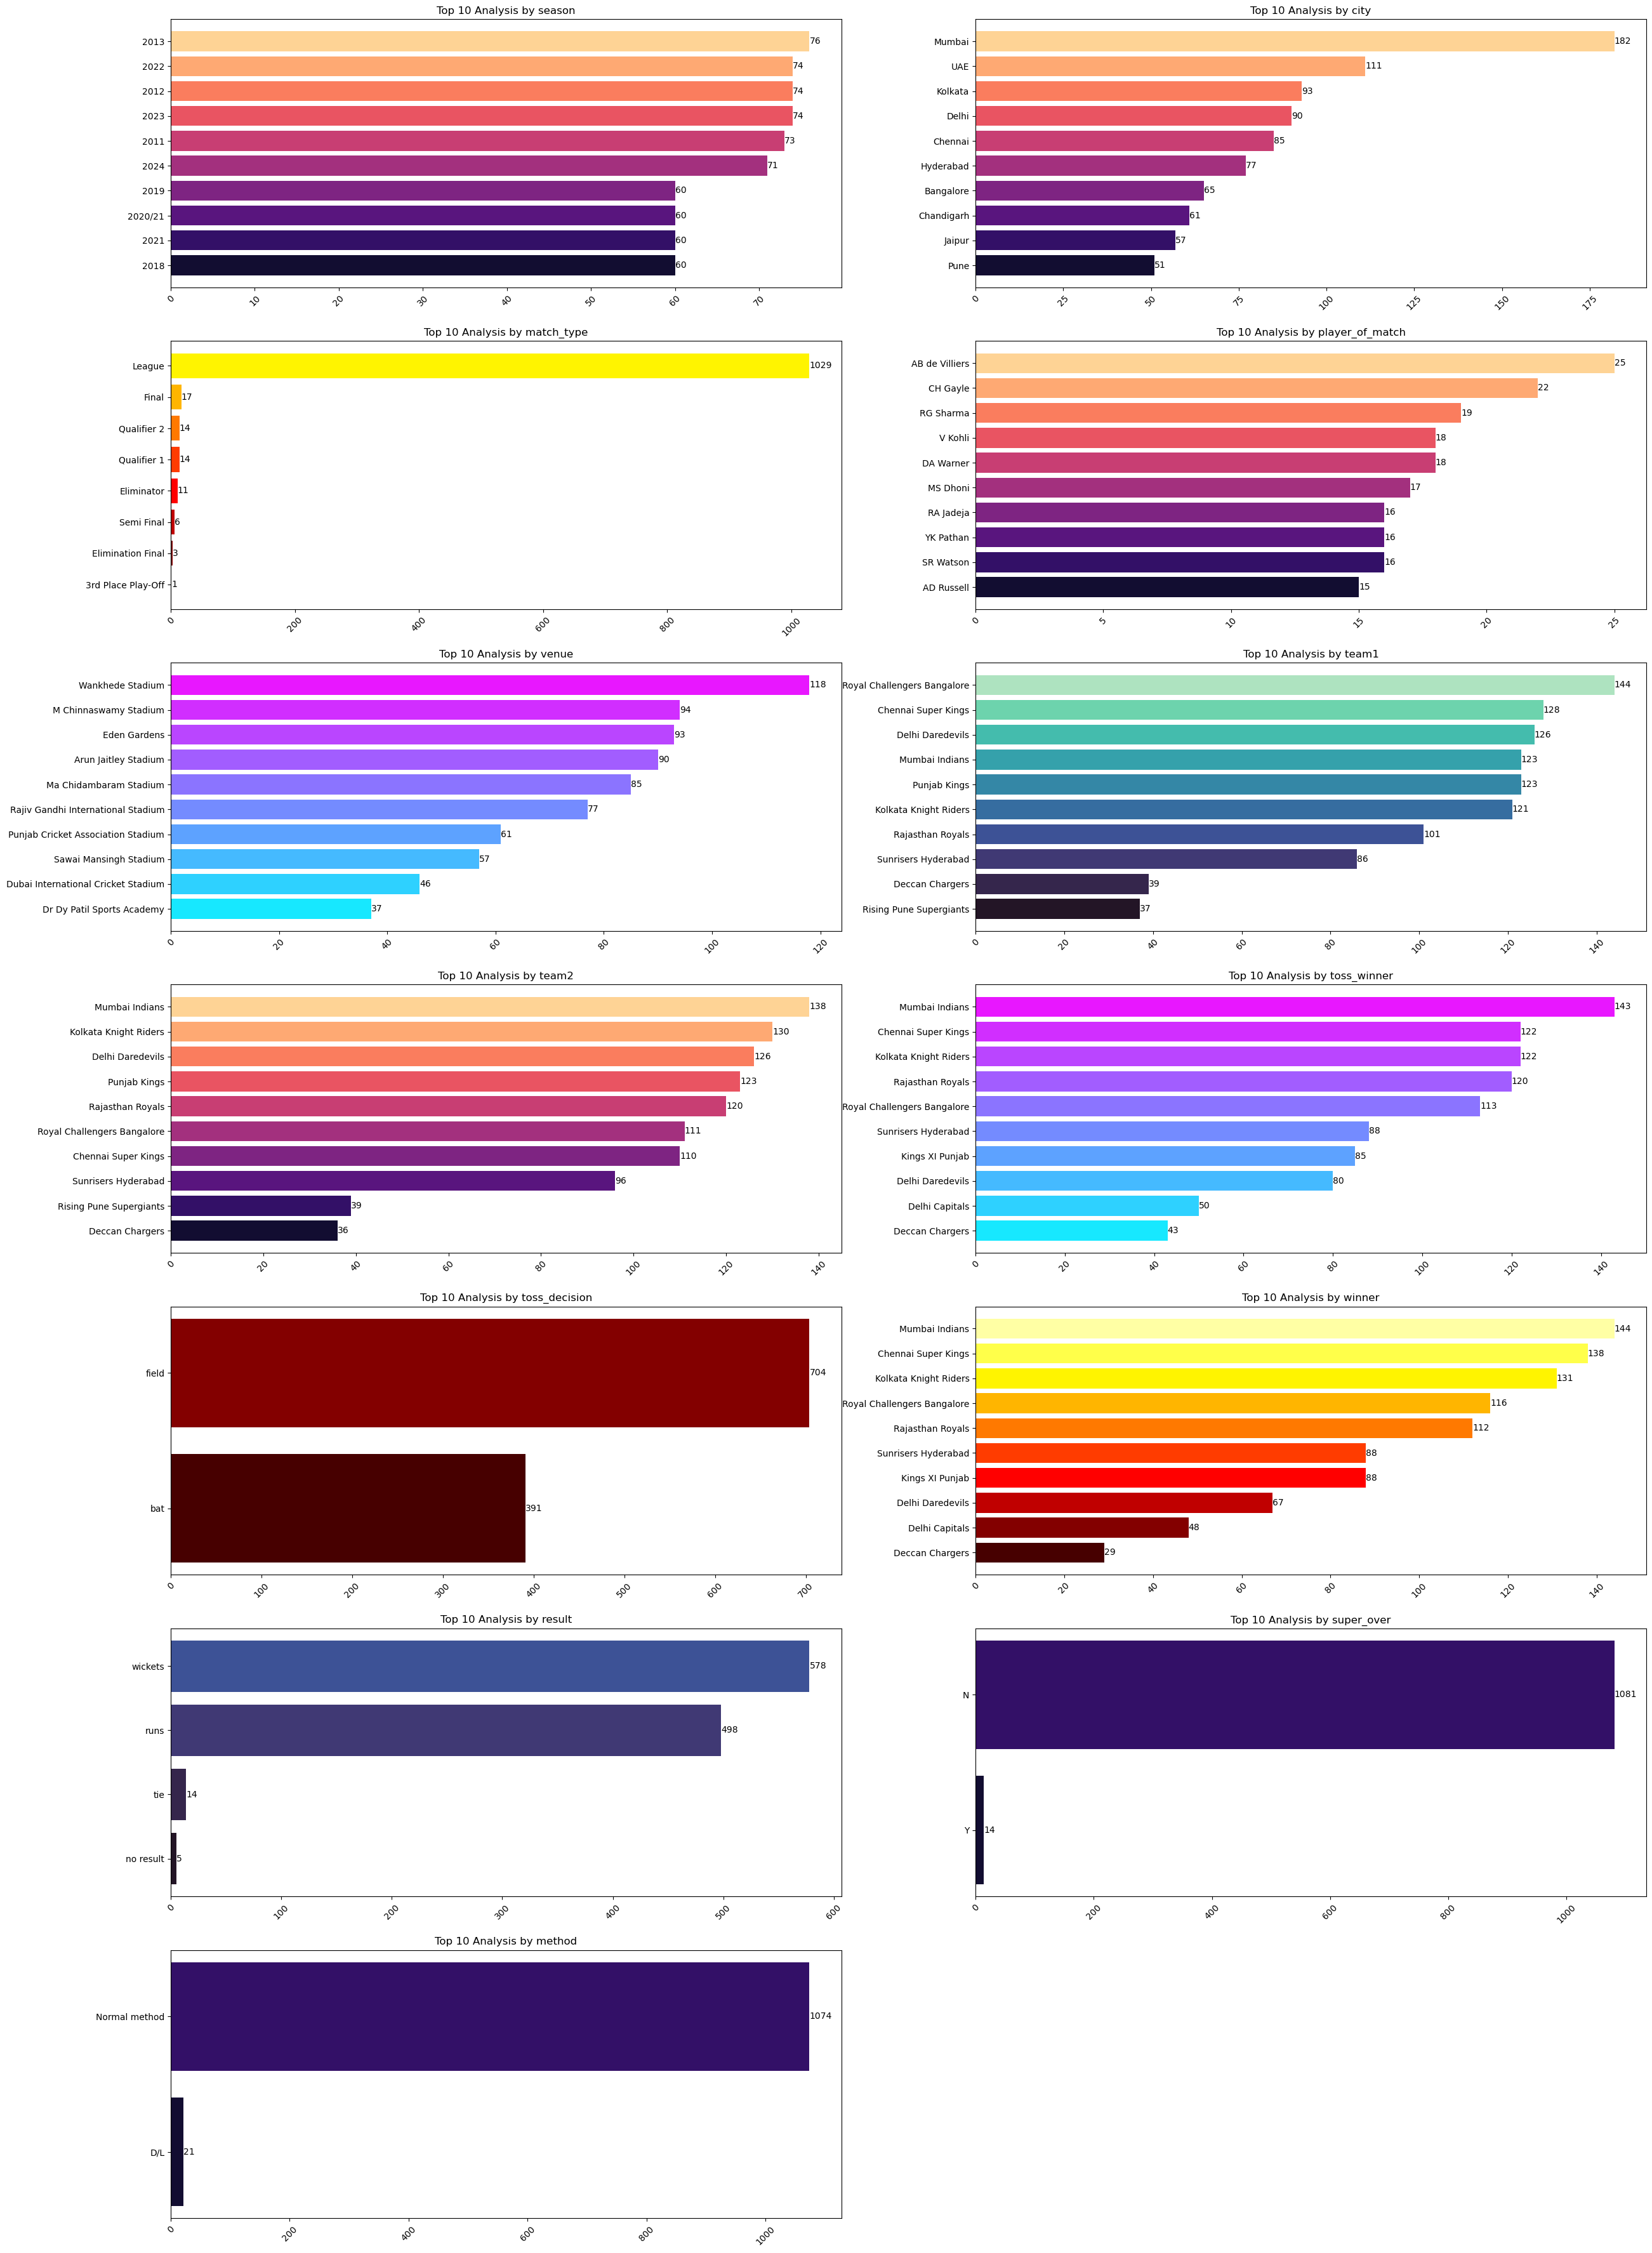

done


In [73]:
plt.figure(figsize =(30,45))
for j,i in enumerate(cat_col):   
    
    temp_df = df_matches[i].value_counts().head(10).sort_values(ascending = True)
    x = temp_df.index
    y = temp_df.values

    plt.subplot(7,2,j+1)
    plt.title(f'Top 10 Analysis by {i}')
    colors = ['cool','mako','hot','magma']
    import random
    ax = plt.barh(x,y,color = sns.color_palette(random.choice(colors),10))
    plt.bar_label(ax)
    plt.xticks(rotation = 45)
plt.savefig('All_Categorical_Analysis.jpeg')
plt.show()
print('done')


In [74]:
# Top 10 target Runs
# Maximum Result Margin Wins
# Top 5 Result Margin Wins
# Season Player of the match

In [75]:
num_col = df_matches.describe().columns
num_col = list(num_col)
num_col.remove('id')
num_col.remove('date')
num_col.remove('target_overs')
num_col

['result_margin', 'target_runs']

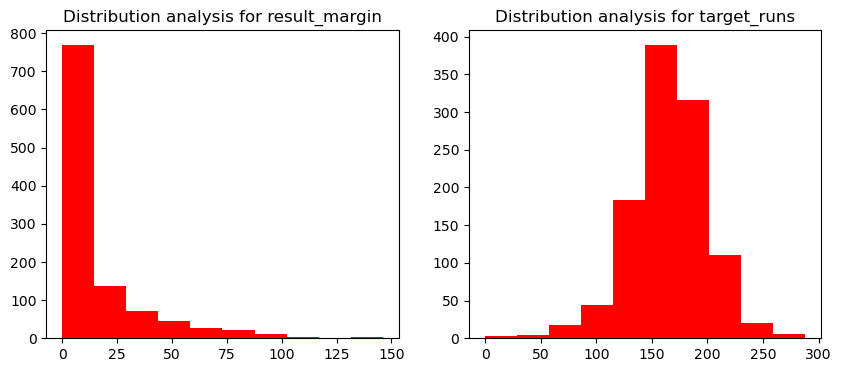

In [76]:
#Numerical histogram
plt.figure(figsize = (10,4))
for j,i in enumerate(num_col):
    plt.subplot(1,2,j+1)
    plt.title(f'Distribution analysis for {i}')
    plt.hist(df_matches[i],color = 'red')
plt.show()

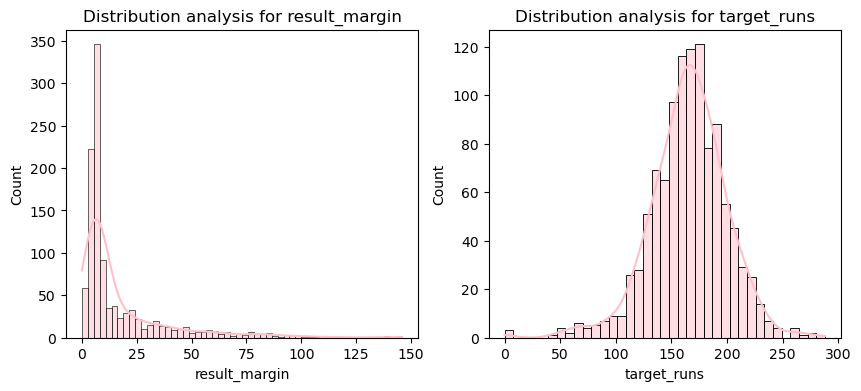

In [77]:
plt.figure(figsize = (10,4))
for j,i in enumerate(num_col):
    plt.subplot(1,2,j+1)
    plt.title(f'Distribution analysis for {i}')
    sns.histplot(df_matches[i],color = 'pink',kde=True) #it tells
plt.show()

In [78]:
#max Target Runs which team?
df_matches[df_matches['target_runs'] == df_matches['target_runs'].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
1053,1426268,2024,Bangalore,2024-04-15,League,TM Head,M Chinnaswamy Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,25.0,288.0,20.0,N,Normal method


In [79]:
temp_df = df_matches[(df_matches['winner'] != 'No winner') & (df_matches['method'] == 'Normal method')]
temp_df[temp_df['target_runs'] == temp_df['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
37,336021,2007/08,Mumbai,2008-05-16,League,SM Pollock,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,68.0,20.0,N,Normal method
611,1082626,2017,Chandigarh,2017-04-30,League,Sandeep Sharma,Punjab Cricket Association Stadium,Punjab Kings,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,10.0,68.0,20.0,N,Normal method


In [80]:
df_matches['target_runs'].value_counts().sort_index().head(20)

target_runs
0.0     3
43.0    1
48.0    1
52.0    1
53.0    1
54.0    1
58.0    1
61.0    1
63.0    1
66.0    1
68.0    2
69.0    2
71.0    3
74.0    1
81.0    2
82.0    1
83.0    1
85.0    1
89.0    2
90.0    1
Name: count, dtype: int64

In [81]:
df_matches[df_matches['date'].dt.year==2017].sort_values(by = 'winner')[['winner','result','result_margin']]

,winner,result,result_margin
591,Delhi Daredevils,runs,51.0
615,Delhi Daredevils,wickets,6.0
617,Delhi Daredevils,wickets,7.0
627,Delhi Daredevils,runs,7.0
625,Delhi Daredevils,wickets,2.0
585,Delhi Daredevils,runs,97.0
599,Gujarat Lions,wickets,4.0
622,Gujarat Lions,wickets,6.0
589,Gujarat Lions,wickets,7.0
606,Gujarat Lions,wickets,7.0


In [82]:
#LOC<ILOC

In [83]:
df_matches.iloc[603,:]

id                                     1082617
season                                    2017
city                                   Kolkata
date                       2017-04-23 00:00:00
match_type                              League
player_of_match                NM Coulter-Nile
venue                             Eden Gardens
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                             82.0
target_runs                              132.0
target_overs                              20.0
super_over                                   N
method                           Normal method
Name: 603, dtype: object

In [84]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method'],
      dtype='object')

In [85]:
#stadium wise Team highest score
df_matches.groupby(['venue','team1'])['target_runs'].agg(['min','max','mean'])

min    max        mean
venue                 team1                                                
Arun Jaitley Stadium  Chennai Super Kings          193.0  224.0  212.000000
                      Delhi Daredevils               0.0  258.0  164.971831
                      Gujarat Lions                163.0  163.0  163.000000
                      Kolkata Knight Riders        128.0  186.0  157.000000
                      Mumbai Indians               169.0  169.0  169.000000
...                                                  ...    ...         ...
Zayed Cricket Stadium Kolkata Knight Riders        172.0  172.0  172.000000
                      Mumbai Indians               156.0  236.0  196.000000
                      Punjab Kings                 136.0  136.0  136.000000
                      Royal Challengers Bangalore   93.0   93.0   93.000000
                      Sunrisers Hyderabad          142.0  142.0  142.000000

[211 rows x 3 columns]

In [86]:
df_matches['year'] = df_matches['date'].dt.year
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'year'],
      dtype='object')

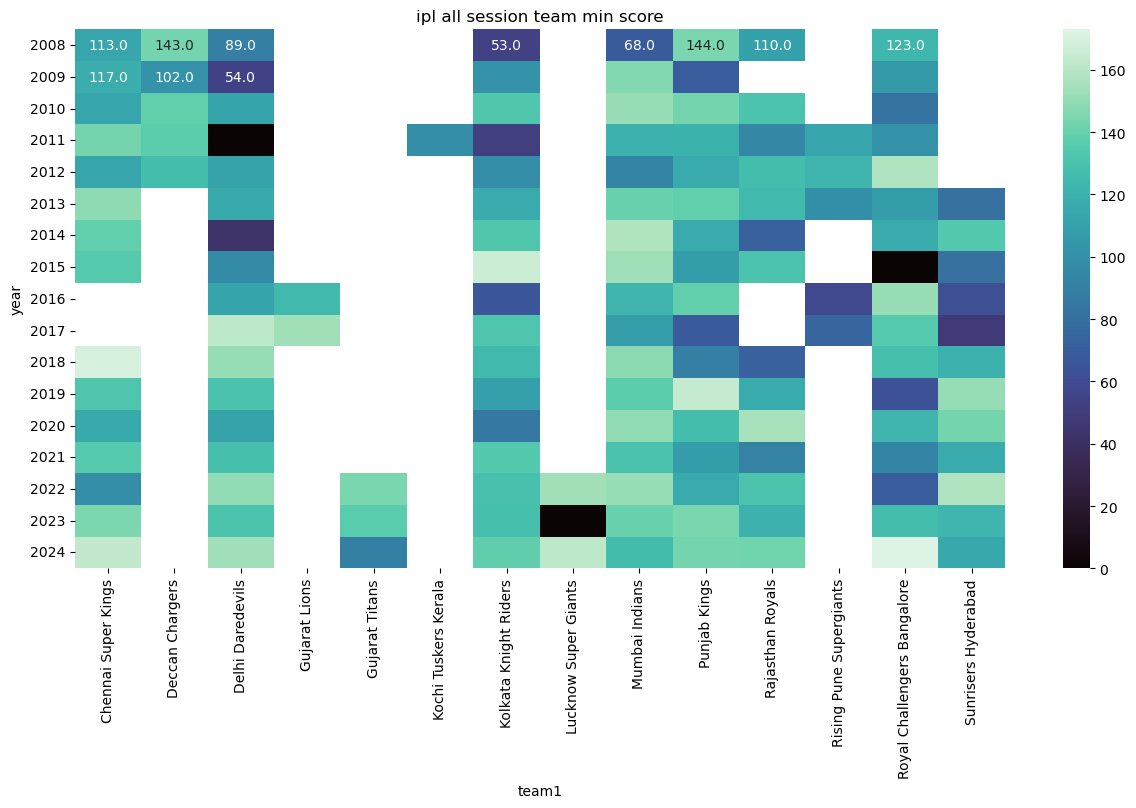

In [87]:
all_team_year_df = df_matches.pivot_table(index = 'year',columns='team1',values='target_runs',aggfunc='min')
all_team_year_df = all_team_year_df.round(0)
plt.figure(figsize=(15,7))
#pd.options.display.float_format = '{:.2f}'.format
sns.heatmap(all_team_year_df,fmt="",annot = True,cmap='mako')
plt.title('ipl all session team min score')
plt.show()

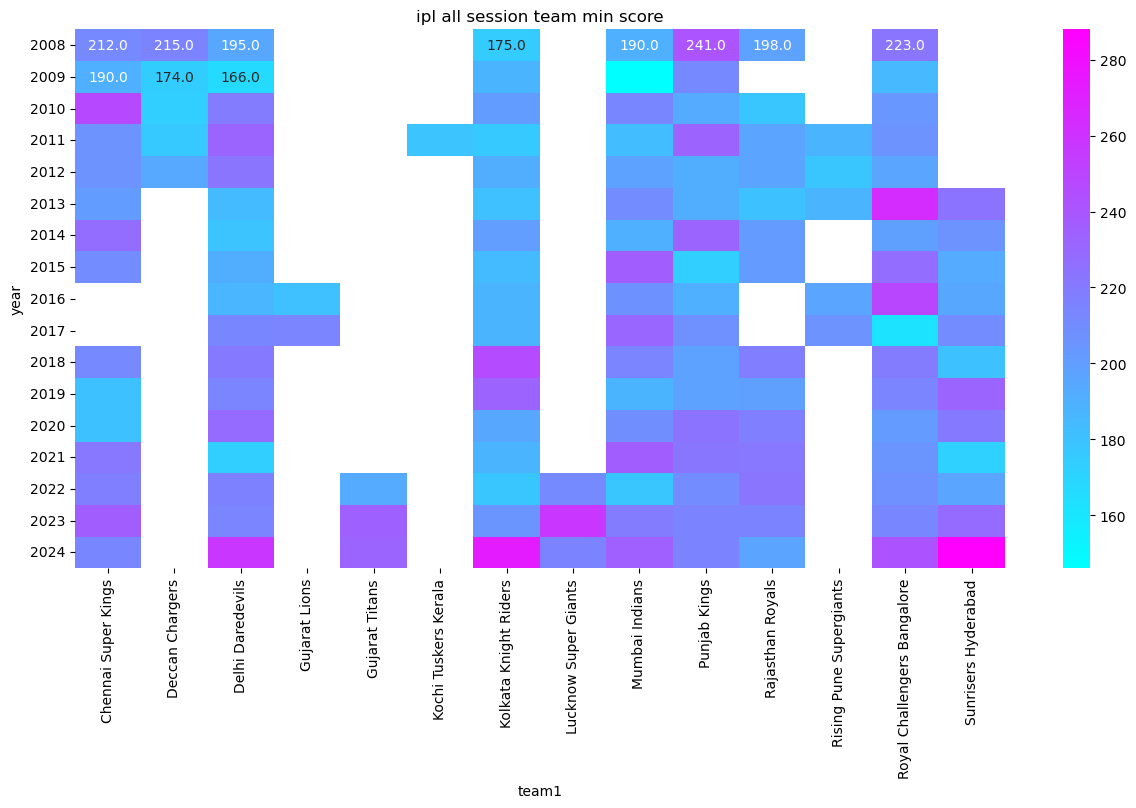

In [88]:
all_team_year_df = df_matches.pivot_table(index = 'year',columns='team1',values='target_runs',aggfunc='max')
all_team_year_df = all_team_year_df.round(0)
plt.figure(figsize=(15,7))
#pd.options.display.float_format = '{:.2f}'.format
sns.heatmap(all_team_year_df,fmt="",annot = True,cmap='cool')
plt.title('ipl all session team min score')
plt.show()

In [177]:
#loc = Location name
#iloc = Index pass}

In [179]:
df_matches.loc[50:55,['team1','team2','result']]

,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bangalore,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs
55,Delhi Daredevils,Rajasthan Royals,runs


In [183]:
df_matches.iloc[50:55,[7,8,12]]

,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bangalore,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs


In [189]:
row = df_matches[df_matches['year']>=2016].index
df_matches.iloc[row,-3:]

,super_over,method,year
517,N,Normal method,2016
518,N,Normal method,2016
519,N,Normal method,2016
520,N,Normal method,2016
521,N,Normal method,2016
...,...,...,...
1090,N,Normal method,2024
1091,N,Normal method,2024
1092,N,Normal method,2024
1093,N,Normal method,2024


In [191]:
df_deliveries.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
186556,1216522,2,Royal Challengers Bangalore,Rajasthan Royals,17,6,AB de Villiers,Kartik Tyagi,Gurkeerat Singh,1,0,1,NaN,0,NaN,NaN,NaN


In [197]:
df_deliveries.iloc[123257,:]

match_id                                 980907
inning                                        1
batting_team        Royal Challengers Bangalore
bowling_team                Sunrisers Hyderabad
over                                         16
ball                                          6
batter                                SR Watson
bowler                                KV Sharma
non_striker                      AB de Villiers
batsman_runs                                  6
extra_runs                                    0
total_runs                                    6
extras_type                                 NaN
is_wicket                                     0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                     NaN
Name: 123257, dtype: object

In [199]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [203]:
df_deliveries.isna().sum().sort_values(ascending = False)

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
batsman_runs             0
is_wicket                0
total_runs               0
extra_runs               0
match_id                 0
inning                   0
bowler                   0
batter                   0
ball                     0
over                     0
bowling_team             0
batting_team             0
non_striker              0
dtype: int64

In [211]:
df_deliveries.loc[:,('fielder','dismissal_kind','player_dismissed','extras_type')]

,fielder,dismissal_kind,player_dismissed,extras_type
0,NaN,NaN,NaN,legbyes
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,wides
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
260915,NaN,NaN,NaN,NaN
260916,NaN,NaN,NaN,NaN
260917,NaN,NaN,NaN,NaN
260918,NaN,NaN,NaN,NaN


In [215]:
normal_cols = ['fielder','dismissal_kind','player_dismissed','extras_type']
for i in normal_cols:
    print(f'Analysis for {i} \n\n')
    display(df_deliveries[i].value_counts().head(10))

Analysis for fielder 




fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
WP Saha           131
V Kohli           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: count, dtype: int64

Analysis for dismissal_kind 




dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Analysis for player_dismissed 




player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64

Analysis for extras_type 




extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

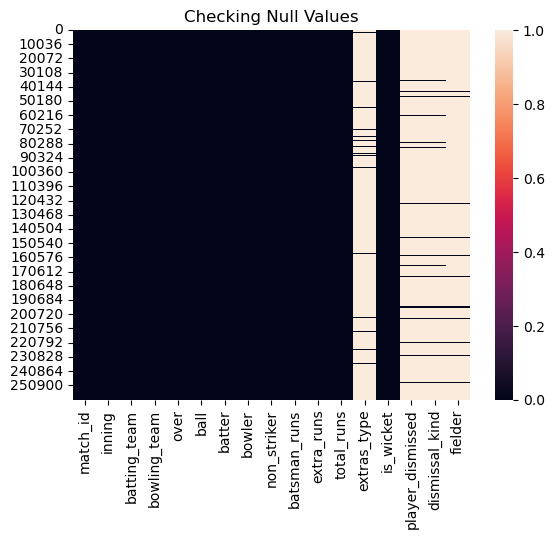

In [219]:
plt.title('Checking Null Values')
sns.heatmap(df_deliveries.isna())
plt.show()

In [221]:
df_deliveries.fillna('unknown',inplace = True)
print('done')

done


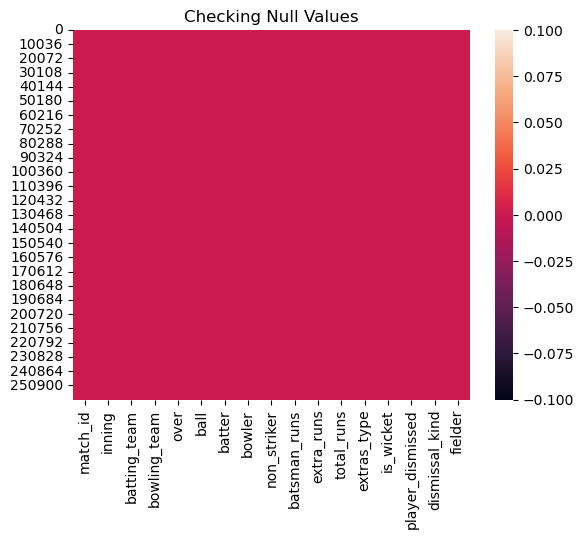

In [223]:
plt.title('Checking Null Values')
sns.heatmap(df_deliveries.isna())
plt.show()

In [225]:
df_deliveries.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
42967,501203,2,Deccan Chargers,Kolkata Knight Riders,16,3,DT Christian,Iqbal Abdulla,DB Ravi Teja,6,0,6,unknown,0,unknown,unknown,unknown


In [267]:
batsman = 'DA Miller'
def get_player_performance_stats(batsman):
    
    player_df = df_deliveries[df_deliveries['batter'] == batsman]
    x = player_df['batsman_runs'].value_counts().sort_index().index
    y = player_df['batsman_runs'].value_counts().sort_index().values
    plt.figure(figsize=(3,2))
    plt.title(f'ANALYSIS FOR {batsman}')
    plt.bar(x,y,color =  sns.color_palette('magma',7))
    plt.bar_label(ax)
    plt.show()
    
    
    total_runs = player_df['batsman_runs'].sum()
    print(f'{batsman} Total run in IPL History : {total_runs}')
    
    print(f'Batsman {batsman} Performance against Bowlers')
    performace_df = player_df.groupby('bowler')['batsman_runs'].agg(['sum','mean']).reset_index().sort_values(by = 'sum',ascending = False)
    display(performace_df)

In [269]:
all_batsman = df_deliveries['batter'].unique()
print('done')

done


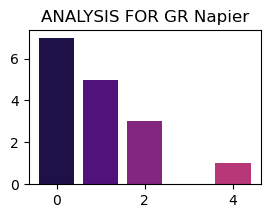

GR Napier Total run in IPL History : 15
Batsman GR Napier Performance against Bowlers


,bowler,sum,mean
1,CH Gayle,10,1.25
2,I Sharma,2,1.00
3,M Kartik,2,0.40
0,BJ Hodge,1,1.00


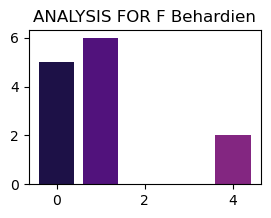

F Behardien Total run in IPL History : 14
Batsman F Behardien Performance against Bowlers


,bowler,sum,mean
1,CJ Jordan,7,1.750000
0,AB Dinda,5,1.000000
2,SR Watson,2,0.666667
3,YS Chahal,0,0.000000


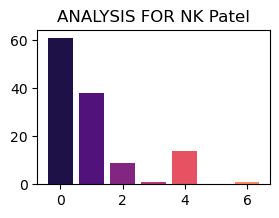

NK Patel Total run in IPL History : 121
Batsman NK Patel Performance against Bowlers


,bowler,sum,mean
18,S Sreesanth,18,2.250000
4,CRD Fernando,16,1.777778
22,VRV Singh,12,2.000000
17,RR Raje,12,1.500000
9,JR Hopes,9,1.500000
2,AB Dinda,7,0.538462
16,RR Powar,6,2.000000
7,IK Pathan,6,0.600000
14,PP Chawla,6,0.857143
0,A Nehra,5,1.250000


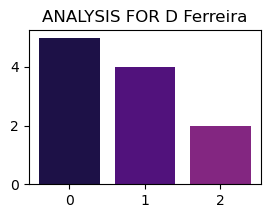

D Ferreira Total run in IPL History : 8
Batsman D Ferreira Performance against Bowlers


,bowler,sum,mean
3,NT Ellis,4,1.333333
0,HV Patel,2,1.000000
1,KK Ahmed,1,0.500000
4,RD Chahar,1,0.333333
2,Kuldeep Yadav,0,0.000000


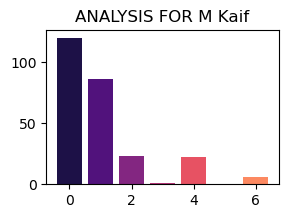

M Kaif Total run in IPL History : 259
Batsman M Kaif Performance against Bowlers


,bowler,sum,mean
3,AB Dinda,25,1.666667
1,A Symonds,25,2.777778
24,M Muralitharan,13,1.300000
38,SJ Srivastava,12,2.000000
22,L Balaji,11,0.916667
29,PP Ojha,11,1.375000
0,A Mishra,11,0.916667
2,AB Agarkar,9,1.125000
13,I Sharma,9,0.900000
41,ST Jayasuriya,7,0.875000


In [271]:
import random

for i in random.choices(all_batsman,k=5):
    get_player_performance_stats(i)